Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5029 - loss: 0.7474 - val_accuracy: 0.5876 - val_loss: 0.6716
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5780 - loss: 0.6703 - val_accuracy: 0.7796 - val_loss: 0.4842
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.7211 - loss: 0.5516 - val_accuracy: 0.6664 - val_loss: 0.6021
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.7494 - loss: 0.5145 - val_accuracy: 0.7566 - val_loss: 0.5458
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.7666 - loss: 0.5047 - val_accuracy: 0.7110 - val_loss: 0.5710
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7810 - loss: 0.4782
Test score: 0.4742
Test accuracy: 0.7846


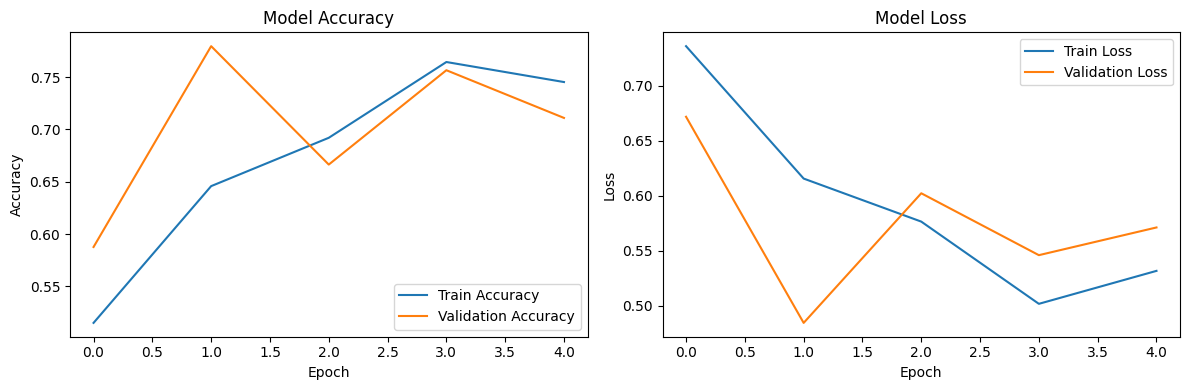

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Review: This movie was fantastic! I loved it.
Sentiment: Positive

Review: I didn't like this film at all. It was boring and too long.
Sentiment: Negative

Review: An average film, nothing special.
Sentiment: Positive



In [ ]:
 import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000  # Only consider the top 10,000 words
maxlen = 200  # Cut texts after this number of words
batch_size = 32

# Load the dataset, keeping only the top `max_features` words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the SimpleRNN model
model = Sequential()
model.add(Embedding(max_features, 128))  # Embedding layer
model.add(SimpleRNN(128, activation='tanh'))  # RNN layer
model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to decode reviews
def decode_review(review):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
    return decoded_review

# Sample reviews for classification
sample_reviews = [
    "This movie was fantastic! I loved it.",
    "I didn't like this film at all. It was boring and too long.",
    "An average film, nothing special.",
]

# Preprocess sample reviews (correct the offset for reserved tokens)
def preprocess_reviews(reviews):
    encoded_reviews = []
    word_index = imdb.get_word_index()

    for review in reviews:
        encoded_review = [word_index.get(word.lower(), 0) + 3 for word in review.split()]
        encoded_reviews.append(encoded_review)

    return sequence.pad_sequences(encoded_reviews, maxlen=maxlen)

# Prepare sample reviews for prediction
encoded_sample_reviews = preprocess_reviews(sample_reviews)

# Make predictions
predictions = model.predict(encoded_sample_reviews)
predicted_classes = (predictions > 0.5).astype("int32")  # 1 for positive, 0 for negative

# Display the results
for review, prediction in zip(sample_reviews, predicted_classes):
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    print(f"Review: {review}\nSentiment: {sentiment}\n")
